In [24]:

!pip install -q supervision

import supervision as sv
import cv2
import os
import numpy as np

print(sv.__version__)

0.22.0


In [25]:


HOME = os.getcwd()
print(HOME)



In [26]:
!mkdir {HOME}/images

In [27]:
os.listdir(HOME)

['dog-4.jpeg',
 'dog.jpeg',
 'yolov8m-seg.pt',
 'AF1QipN_HASYAtI61aiIYYZSjD55pqNLUMP7XjZx-UU',
 'images',
 'dog-5.jpeg',
 'dog-3.jpeg',
 'dog-2.jpeg.1',
 'dog-8.jpeg.1',
 'dog-3.jpeg.1',
 'dog-6.jpeg.1',
 'dog-7.jpeg.1',
 'dog-4.jpeg.1',
 'dog-7.jpeg',
 'dog-5.jpeg.1',
 'dog-2.jpeg',
 'dog-6.jpeg',
 'dog-8.jpeg',
 'yolov8m.pt']

In [28]:
%cd {HOME}/images

!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-5.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-6.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-7.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-8.jpeg

/content/images
/content/images/images


In [32]:


IMAGE_PATH = f"{HOME}/images/dog-2.jpeg"
image = cv2.imread(IMAGE_PATH)

In [30]:

!pip install -q super-gradients

In [33]:
from super_gradients.training import models

model = models.get("yolo_nas_l", pretrained_weights="coco")
result = model.predict(image)
detections = sv.Detections.from_yolo_nas(result)

[2024-07-15 14:06:50] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-07-15 14:06:50] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-07-15 14:06:51] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-07-15 14:06:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes 

In [34]:


"detections", len(detections)

('detections', 28)

In [35]:
!pip install -q ultralytics


from ultralytics import YOLO

model = YOLO("yolov8m.pt")
result = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)


100%|██████████| 49.7M/49.7M [00:00<00:00, 218MB/s]


In [36]:
model = YOLO("yolov8m-seg.pt")
result = model(image, verbose=False)[0]
detections_segmentation = sv.Detections.from_ultralytics(result)

100%|██████████| 52.4M/52.4M [00:00<00:00, 187MB/s]


In [37]:
"detections", len(detections)

('detections', 18)

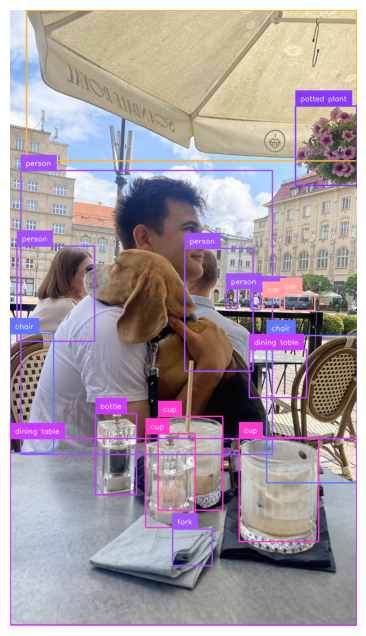

In [38]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(image.copy(), detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

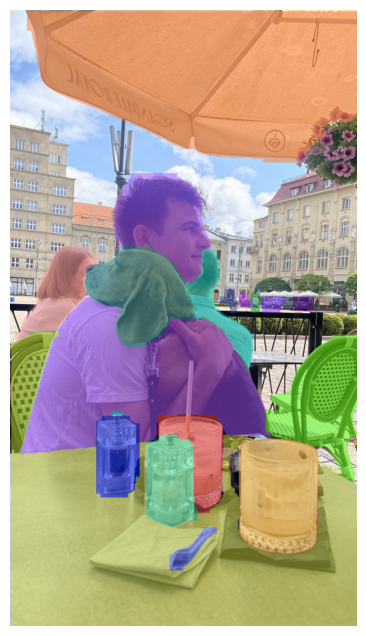

In [39]:
# MaskAnnotator

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

annotated_image = mask_annotator.annotate(
    image.copy(), detections=detections_segmentation
)

sv.plot_image(image=annotated_image, size=(8, 8))